In [5]:
import cv2
clicked_position = None
def get_coordinates(event, x, y, flags, param):
    global clicked_position
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_position = (x, y)
        bgr_value = image[y, x]
        rgb_value = (bgr_value[2], bgr_value[1], bgr_value[0])
        print(f"Clicked Coordinates: ({x}, {y})")
        print(f"Color (BGR): {bgr_value}")
        print(f"Color (RGB): {rgb_value}")
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow("Image", image)
image = cv2.imread('Elephant.jpg')
cv2.imshow("Image", image)
cv2.setMouseCallback("Image", get_coordinates)
cv2.waitKey(0)
cv2.destroyAllWindows()


Clicked Coordinates: (130, 117)
Color (BGR): [34 55 53]
Color (RGB): (53, 55, 34)
Clicked Coordinates: (144, 47)
Color (BGR): [117 123 134]
Color (RGB): (134, 123, 117)
Clicked Coordinates: (35, 25)
Color (BGR): [193 188 189]
Color (RGB): (189, 188, 193)
Clicked Coordinates: (32, 60)
Color (BGR): [106 194 254]
Color (RGB): (254, 194, 106)
Clicked Coordinates: (25, 91)
Color (BGR): [ 63 148 220]
Color (RGB): (220, 148, 63)
Clicked Coordinates: (61, 89)
Color (BGR): [ 71 149 215]
Color (RGB): (215, 149, 71)
Clicked Coordinates: (80, 12)
Color (BGR): [222 204 197]
Color (RGB): (197, 204, 222)
Clicked Coordinates: (128, 12)
Color (BGR): [176 166 159]
Color (RGB): (159, 166, 176)
Clicked Coordinates: (170, 32)
Color (BGR): [180 191 211]
Color (RGB): (211, 191, 180)
Clicked Coordinates: (175, 100)
Color (BGR): [ 84 155 219]
Color (RGB): (219, 155, 84)
Clicked Coordinates: (176, 153)
Color (BGR): [ 74 150 216]
Color (RGB): (216, 150, 74)
Clicked Coordinates: (20, 123)
Color (BGR): [ 90 172 23

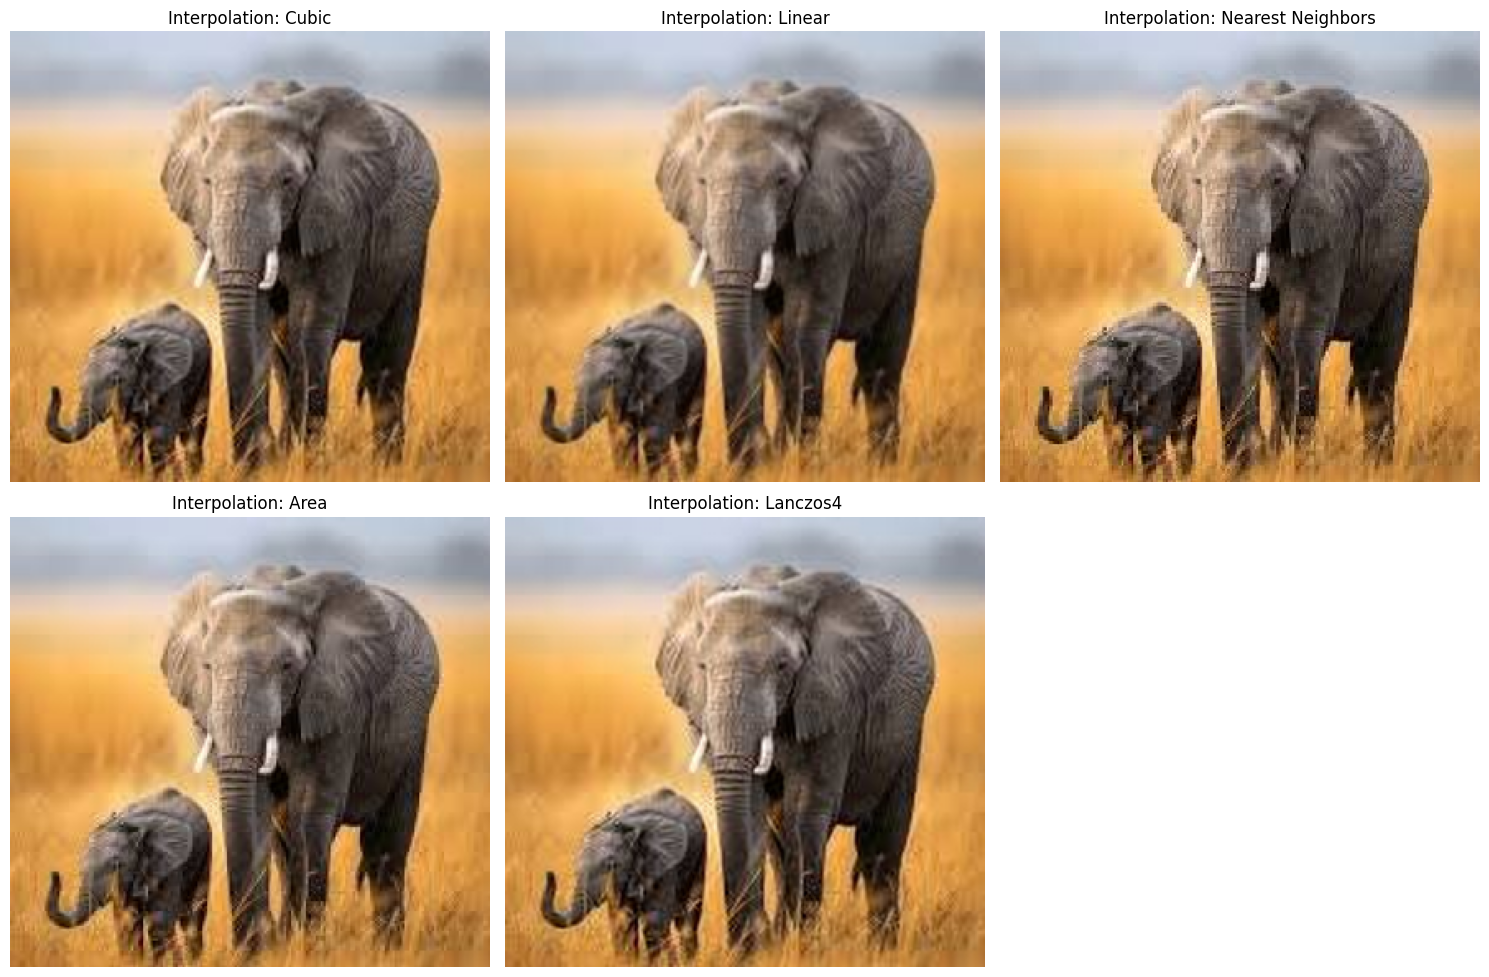

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Elephant.jpg')

scale_x = 1.5
scale_y = 1.5

interpolation_methods = {
    'Cubic': cv2.INTER_CUBIC,
    'Linear': cv2.INTER_LINEAR,
    'Nearest Neighbors': cv2.INTER_NEAREST,
    'Area': cv2.INTER_AREA,
    'Lanczos4': cv2.INTER_LANCZOS4
}

plt.figure(figsize=(15, 10))

for idx, (method_name, interpolation) in enumerate(interpolation_methods.items()):
    resized_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=interpolation)
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, idx + 1)
    plt.imshow(resized_image_rgb)
    plt.title(f"Interpolation: {method_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


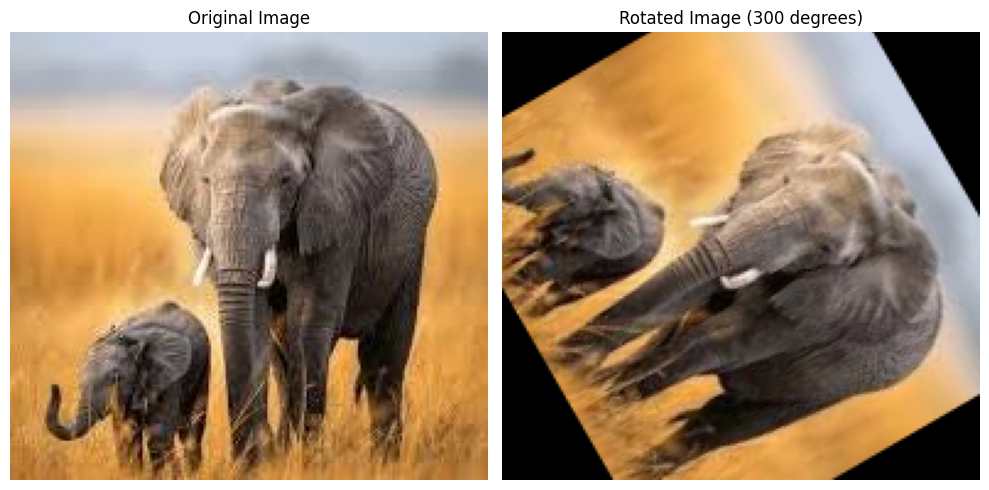

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Elephant.jpg')
rows, cols = image.shape[:2]
M_translation = np.float32([[1, 0, 20], [0, 1, 30]])
translated_image = cv2.warpAffine(image, M_translation, (cols, rows))
M_rotation = cv2.getRotationMatrix2D((cols / 2, rows / 2), 300, 1)
rotated_image = cv2.warpAffine(image, M_rotation, (cols, rows))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (300 degrees)')
plt.axis('off')
plt.tight_layout()
plt.show()


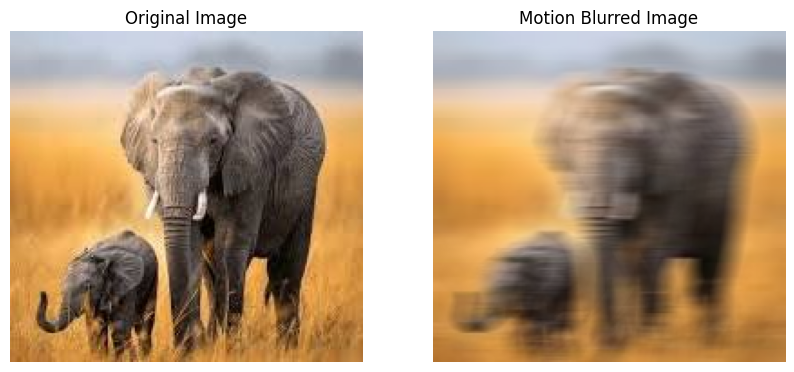

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def motion_blur(image, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)  
    kernel = kernel / kernel_size 
    return cv2.filter2D(image, -1, kernel)

image = cv2.imread('Elephant.jpg')

if image is None:
    print("Error: Could not load the image.")
else:
    blurred_image = motion_blur(image)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(blurred_image_rgb)
    plt.title('Motion Blurred Image')
    plt.axis('off')
    plt.show()